# Pathology image conveter

## Overview
The Pathology Slide Converter is a powerful tool designed to convert various formats of pathology images. With the release of version 2.1.0, it now offers support for converting all slide formats compatible with the SlideIO library to Aperio SVS slides. This comprehensive tutorial will guide you through the implementation details of the converter.

The key function responsible for the conversion process is **convert_scene**. It takes a **Scene** object and an output file path as its required parameters. Additionally, it accepts `conversion parameters` argument, allowing you to specify details such as compression, tile size, and other conversion settings. You also have the option to provide a callback function to track and display the progress of the conversion.
```python
convert_scene(scene, params, output_path, callback=None)
```
where:
- *scene*: a **Scene** object to be saved as an Aperio SVS file;
- *params*: parameters of the output_file. Can be an instance of class **SVSJpegParameters** or class **SVSJp2KParameters**;
- *output_path*: a path to the output file;
- *callback*: a callback function.
Improved version:

The *Params* parameter allows you to specify additional details about the structure and compression of the output file. Currently, it supports two options: 
- If you choose an instance of the **SVSJpegParameters** class, the output file will be JPEG compressed SVS format.
- If you choose an instance of the **SVSJp2KParameters** class, the output file will be compressed using the JPEG2000 format.

By selecting the appropriate parameter class, you can customize the compression method for the output file according to your requirements. Description of parameter classes is shown in the tables below.

<table style="margin-left:0">
    <tr>
        <td style="text-align: center;">
            <h3>SVSJpegParameters</h3>
        </td>
        <td style="text-align: center;">
            <h3>SVSJp2KParameters</h3>
        </td>
    </tr>
    <tr>
        <td>
            <table style="text-align: left; border-collapse: collapse;">
                <tr>
                    <th style="border: 1px solid black; padding: 8px; font-weight: bold;">Property</th>
                    <th style="border: 1px solid black; padding: 8px; font-weight: bold;">Description</th>
                </tr>
                <tr>
                    <td style="border: 1px solid black; padding: 8px;">quality</td>
                    <td style="border: 1px solid black; padding: 8px;">Quality of JPEG encoding (1-100)</td>
                </tr>
                <tr>
                    <td style="border: 1px solid black; padding: 8px;">num_zoom_levels</td>
                    <td style="border: 1px solid black; padding: 8px;">Number of zoom levels (0: automatic, 1-N: number of levels in the zoom pyramid)</td>
                </tr>
                <tr>
                    <td style="border: 1px solid black; padding: 8px;">tile_height</td>
                    <td style="border: 1px solid black; padding: 8px;">Height of tiles in pixels (default: 256)</td>
                </tr>
                <tr>
                    <td style="border: 1px solid black; padding: 8px;">tile_width</td>
                    <td style="border: 1px solid black; padding: 8px;">Width of tiles in pixels (default: 256)</td>
                </tr>
                <tr>
                    <td style="border: 1px solid black; padding: 8px;">rect</td>
                    <td style="border: 1px solid black; padding: 8px;">Scene region to be converted (default is the whole scene)</td>
                </tr>
                <tr>
                    <td style="border: 1px solid black; padding: 8px;">t_frame</td>
                    <td style="border: 1px solid black; padding: 8px;">Index of a time frame for multi-dimensional images(default: 0)</td>
                </tr>
                <tr>
                    <td style="border: 1px solid black; padding: 8px;">z_slice</td>
                    <td style="border: 1px solid black; padding: 8px;">Index of a Z slice for 3/4D images(default:0)</td>
                </tr>
            </table>
        </td>
        <td>
            <table style="border-collapse: collapse;">
                <tr>
                    <th style="text-align: left; border: 1px solid black; padding: 8px; font-weight: bold;">Property
                    </th>
                    <th style="text-align: left; border: 1px solid black; padding: 8px; font-weight: bold;">Description
                    </th>
                </tr>
                <tr>
                    <td style="border: 1px solid black; padding: 8px;">num_zoom_levels</td>
                    <td style="border: 1px solid black; padding: 8px;">Number of zoom levels (0: automatic, 1-N: number of levels in the zoom pyramid)</td>
                </tr>
                <tr>
                    <td style="border: 1px solid black; padding: 8px;">tile_height</td>
                    <td style="border: 1px solid black; padding: 8px;">Height of tiles in pixels (default: 256)</td>
                </tr>
                <tr>
                    <td style="border: 1px solid black; padding: 8px;">tile_width</td>
                    <td style="border: 1px solid black; padding: 8px;">Width of tiles in pixels (default: 256)</td>
                </tr>
                <tr>
                    <td style="border: 1px solid black; padding: 8px;">rect</td>
                    <td style="border: 1px solid black; padding: 8px;">Scene region to be converted (default is the whole scene)</td>
                </tr>
                <tr>
                    <td style="border: 1px solid black; padding: 8px;">t_frame</td>
                    <td style="border: 1px solid black; padding: 8px;">Index of a time frame for multi-dimensional images(default: 0)</td>
                </tr>
                <tr>
                    <td style="border: 1px solid black; padding: 8px;">z_slice</td>
                    <td style="border: 1px solid black; padding: 8px;">Index of a Z slice for 3/4D images(default:0)</td>
                </tr>
            </table>
        </td>
    </tr>
</table>

The field **rect** of the parameter classes is an object with the following properties:
- x: horizontal shift of the left top corner of the rectangle from the scene origin in pixels;
- y: vertical shift of the left top corner of the rectangle from the scene origin in pixels;
- width: rectangle width in pixels;
- height: rectangle height in pixels;

In [1]:
import slideio
from utils import get_test_images, display_test_image_info, show_images, show_image, get_driver_test_images, delete_file, show_scenes, show_scene_info, show_scene_info_tables, create_output_file_path
from IPython.display import display, HTML

## Test images
For the future demonstration of the library, we will be utilizing some test images. Information regarding the images and the drivers required for image processing is stored in the *image.json* file. The helper utility *get_test_images* loads this image information into a list for convenient access and utilization during the demonstration.

In [2]:
images = get_test_images()
display_test_image_info(images)

Image Path,Driver
./images/CMU-1-Small-Region.svs,SVS
./images/MR-MONO2-8-16x-heart,DCM
./images/08_18_2018_enc_1001_633.czi,CZI
./images/pJP31mCherry.czi,CZI
./images/Airbus_Pleiades_50cm_8bit_RGB_Yogyakarta.jpg,GDAL
./images/test3-DAPI-2-(387).ndpi,NDPI
./images/test3-FITC 2 (485).ndpi,NDPI
./images/test3-TRITC 2 (560).ndpi,NDPI
./images/Leica-Fluorescence-1.scn,SCN
./images/Zeiss-1-Merged.zvi,ZVI


## Convert the whole image with Jpeg conversion
The code snippet below demonstrates conversion of the first scene of scn file to an SVS file 

Property,Value
Name,image_0000000591
File Path,./images/Leica-Fluorescence-1.scn
"Size (Width, Height)","(4737, 6338)"
Number of Channels,3
Compression,Compression.Unknown
Data Type,uint8
Magnification,20.0
Resolution,"(5.000000000000001e-07, 5.000000000000001e-07)"
Z-Resolution,0.0
Time Resolution,0.0


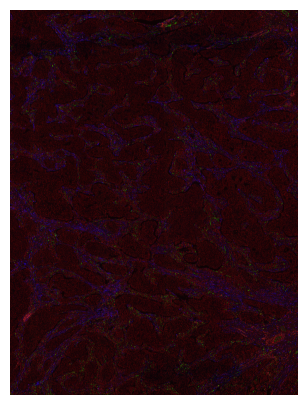

In [3]:
# Load input scene from a czi file
input_path =  get_driver_test_images("SCN")[0]
scene = slideio.open_slide(input_path, 'AUTO').get_scene(0)
# Display scene information
show_scene_info(scene)
show_image(scene.read_block(), 500)

In [4]:
# Output file path
output_path = create_output_file_path(input_path)
delete_file(output_path)
# Conversion parameters
params = slideio.SVSJpegParameters()
# Conversion
slideio.convert_scene(scene, params, output_path)

Property,Value
Name,Image
File Path,./temp/Leica-Fluorescence-1.svs
"Size (Width, Height)","(4737, 6338)"
Number of Channels,3
Compression,Compression.Jpeg
Data Type,uint8
Magnification,0.0
Resolution,"(0.0, 0.0)"
Z-Resolution,0.0
Time Resolution,0.0


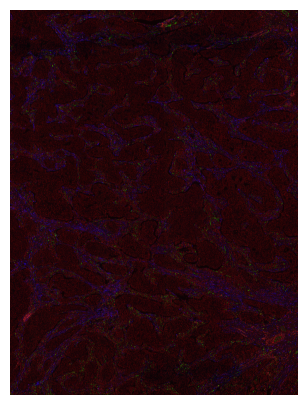

In [5]:
# Open converted file
svs_scene = slideio.open_slide(output_path,'AUTO').get_scene(0)
# Display properties of the new scene
show_scene_info(svs_scene)
# Display image
image = svs_scene.read_block()
show_image(image, 500)

## Conversion of a rectangular block of a scene with JPEG compression

Number of scenes: 2


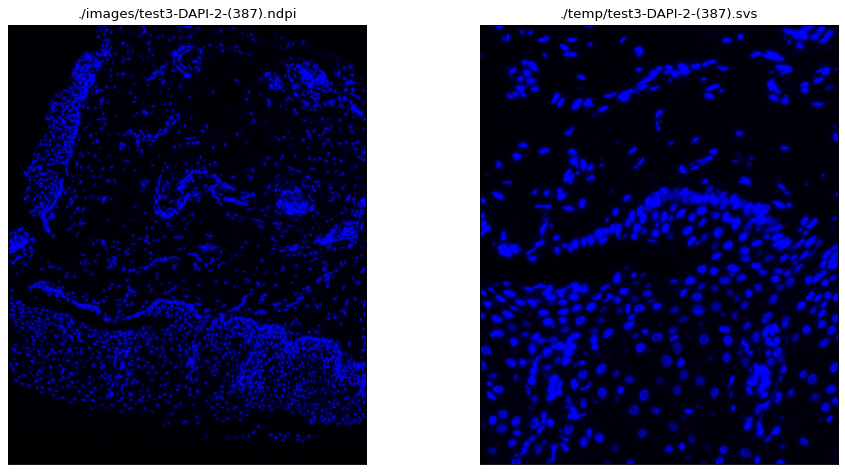

Property,Value
Name,main
File Path,./images/test3-DAPI-2-(387).ndpi
"Size (Width, Height)","(3968, 4864)"
Number of Channels,3
Compression,Compression.Jpeg
Data Type,uint8
Magnification,40.0
Resolution,"(2.281750559028887e-07, 2.281750559028887e-07)"
Z-Resolution,0.0
Time Resolution,0.0


In [6]:
input_path =  get_driver_test_images("NDPI")[0]
output_path = create_output_file_path(input_path)
params = slideio.SVSJpegParameters()
params.quality = 75
delete_file(output_path)
with slideio.open_slide(input_path,'AUTO') as slide:
    origin_scene = slide.get_scene(0)
    size = origin_scene.size
    params.rect.x = size[0]//4
    params.rect.y = size[1]//2
    params.rect.width = size[0]//3
    params.rect.height = size[1]//3
    slideio.convert_scene(origin_scene, params, output_path)
    svs_slide = slideio.open_slide(output_path)
    svs_scene = svs_slide.get_scene(0)
    show_scenes([origin_scene, svs_scene], 3, (500,500))
    show_scene_info_tables([origin_scene, svs_scene])

## Conversion of a rectangular block of scene with JPEG 2000 compression

Number of scenes: 2


TIFFSetField: ./temp/test3-DAPI-2-(387).svs: Unknown pseudo-tag 65537.
TIFFSetField: ./temp/test3-DAPI-2-(387).svs: Unknown pseudo-tag 65537.


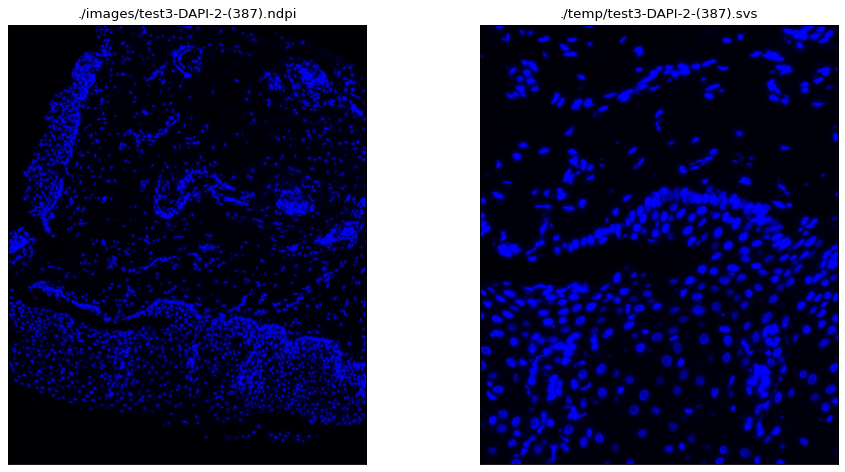

Property,Value
Name,main
File Path,./images/test3-DAPI-2-(387).ndpi
"Size (Width, Height)","(3968, 4864)"
Number of Channels,3
Compression,Compression.Jpeg
Data Type,uint8
Magnification,40.0
Resolution,"(2.281750559028887e-07, 2.281750559028887e-07)"
Z-Resolution,0.0
Time Resolution,0.0


In [7]:
input_path =  get_driver_test_images("NDPI")[0]
output_path = create_output_file_path(input_path)
params = slideio.SVSJp2KParameters()
delete_file(output_path)
with slideio.open_slide(input_path,'AUTO') as slide:
    origin_scene = slide.get_scene(0)
    size = origin_scene.size
    params.rect.x = size[0]//4
    params.rect.y = size[1]//2
    params.rect.width = size[0]//3
    params.rect.height = size[1]//3
    slideio.convert_scene(origin_scene, params, output_path)
    svs_slide = slideio.open_slide(output_path)
    svs_scene = svs_slide.get_scene(0)
    show_scenes([origin_scene, svs_scene], 3, (500,500))
    show_scene_info_tables([origin_scene, svs_scene])

In [17]:
input_path =  get_driver_test_images("CZI")[0]
output_path = create_output_file_path(input_path)
params = slideio.SVSJp2KParameters()
delete_file(output_path)
with slideio.open_slide(input_path,'AUTO') as slide:
    origin_scene = slide.get_scene(0)
    size = origin_scene.size
    params.rect.x = size[0]//4
    params.rect.y = size[1]//2
    params.rect.width = size[0]//3
    params.rect.height = size[1]//3
    slideio.convert_scene(origin_scene, params, output_path)
    svs_slide = slideio.open_slide(output_path)
    svs_scene = svs_slide.get_scene(0)
    show_scenes([origin_scene, svs_scene], 3, (500,500))
    show_scene_info_tables([origin_scene, svs_scene])

TIFFSetField: ./temp/08_18_2018_enc_1001_633.svs: Unknown pseudo-tag 65537.


RuntimeError: OpenCV(4.1.1) /Users/runner/.conan/data/opencv/4.1.1/slideio/stable/build/1920e1936549d6d1eab0074746dead16d3b2576b/source_subfolder/modules/core/src/copy.cpp:528: error: (-215:Assertion failed) checkScalar(value, type(), _value.kind(), _InputArray::MAT ) in function 'setTo'
